## Data analysis for "The company" (masked)

### About "The company"

### Problem Statement

In [1]:
#Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing and reading the data:
df = pd.read_csv('The_company.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
# Structure of data(rows and columns)
df.shape

(550068, 10)

In [4]:
# Columns in data
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
# Check for null values in data
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
# Unique attributes for each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [7]:
# Characteristics of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
# Statistical information for data
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### Observation

### Data corelation using Heatmap

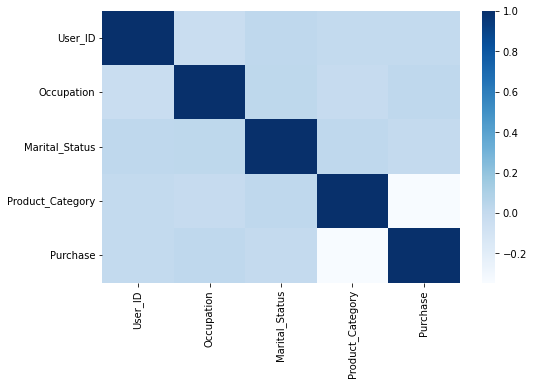

In [9]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(), cmap="Blues")
plt.show()

### Observation

### Outlier detection using Inter-Quartile Range(IQR) method

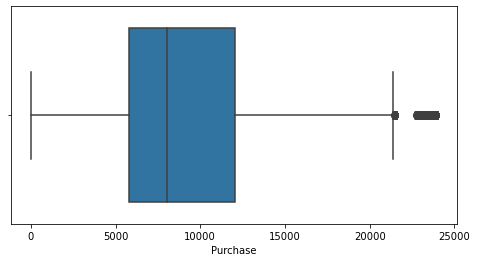

In [10]:
# Outlier detection using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Purchase'], orient='h')
plt.show()


In [11]:
# Finding the Inter-Quartile range for purchase
percentile_25 = df['Purchase'].quantile(0.25)
percentile_75 = df['Purchase'].quantile(0.75)
IQR = percentile_75 - percentile_25
IQR

6231.0

In [12]:
# Upper and lower limit for Purchase
upper_limit_purchase = percentile_75 + 1.5 * IQR
lower_limit_purchase = percentile_25 - 1.5 * IQR
print('Upper limit for purchase is',upper_limit_purchase)
print('Lower limit for purchase is',lower_limit_purchase)

Upper limit for purchase is 21400.5
Lower limit for purchase is -3523.5


### Observation

### Univariate analysis

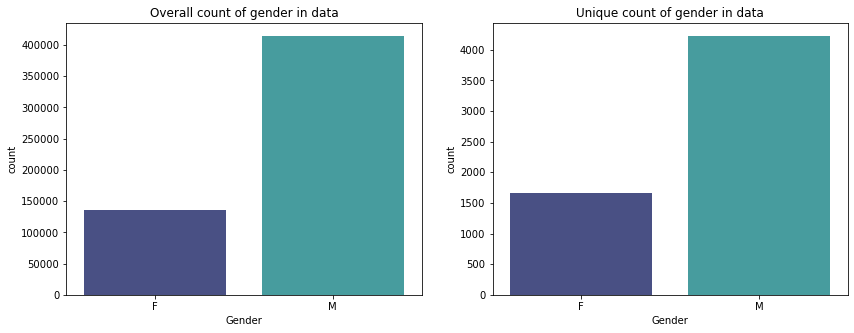

In [13]:
# Count for the gender
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x=df['Gender'], palette = "mako", ax=axis[0])
axis[0].set_title('Overall count of gender in data')
unique_user = df.groupby(['User_ID','Gender']).sum().reset_index()
sns.countplot(x=unique_user['Gender'], palette = "mako", ax=axis[1])
axis[1].set_title('Unique count of gender in data')
plt.show()

In [14]:
# Overall count of gender in data
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
# Percentage of overall gender (male and female)
male_p = round(len(df[df['Gender']=='M'].value_counts()) / len(df) * 100, 2)
female_p = round(len(df[df['Gender']=='F'].value_counts()) / len(df) * 100, 2)
print('Percentage of overall males is',male_p,'%')
print('Percentage of overall females is',female_p,'%')

Percentage of overall males is 75.31 %
Percentage of overall females is 24.69 %


### Observation

In [16]:
# Unique count of gender in data
unique_user['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [17]:
# Percentage of unique gender (male and female)
umale_p = round(len(unique_user[unique_user['Gender']=='M'].value_counts()) / len(unique_user) * 100, 2)
ufemale_p = round(len(unique_user[unique_user['Gender']=='F'].value_counts()) / len(unique_user) * 100, 2)
print('Percentage of unique males is',umale_p,'%')
print('Percentage of unique females is',ufemale_p,'%')

Percentage of unique males is 71.72 %
Percentage of unique females is 28.28 %


### Observation

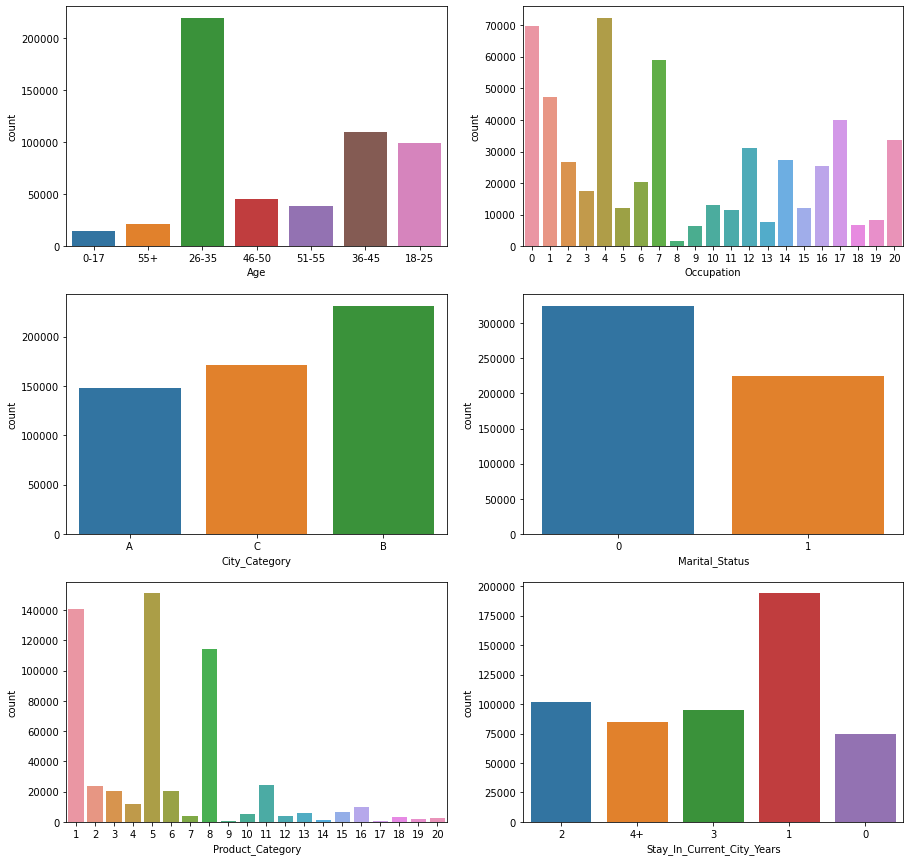

In [18]:
# Univariate analysis for each variable
fig, axis = plt.subplots(3,2,figsize=(15,15))
sns.countplot(x=df['Age'], ax=axis[0,0])
sns.countplot(x=df['Occupation'], ax=axis[0,1])
sns.countplot(x=df['City_Category'], ax=axis[1,0])
sns.countplot(x=df['Marital_Status'], ax=axis[1,1])
sns.countplot(x=df['Product_Category'], ax=axis[2,0])
sns.countplot(x=df['Stay_In_Current_City_Years'], ax=axis[2,1])
plt.show()

In [19]:
# Data distribution for each variable in percentage
col = ['Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category', 'Stay_In_Current_City_Years']
for i in col:
    print('value count percentage for',i,'variable')
    print(df[i].value_counts() / len(df)*100)

value count percentage for Age variable
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64
value count percentage for Occupation variable
4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64
value count percentage for City_Category variable
B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64
value count percentage for Marital_Status variable
0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64
value count percentage for Product_Category variable
5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6  

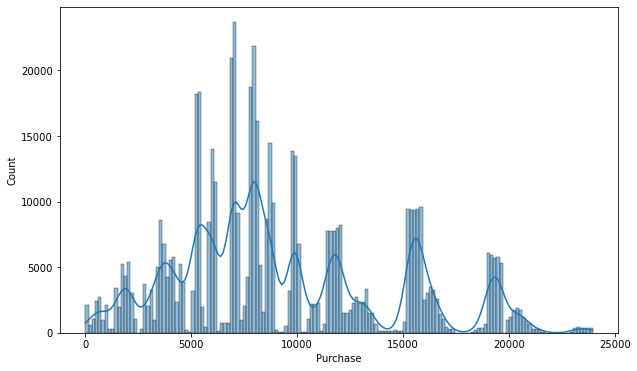

In [20]:
# Univariate analysis for purchase variable
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

### Observation

### Bivariate analysis

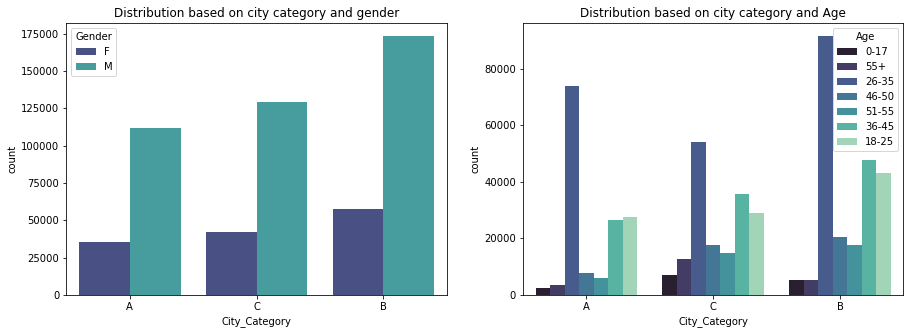

In [21]:
# Distribution based on city category
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['City_Category'], hue=df['Gender'], palette='mako', ax=axis[0]).set_title('Distribution based on city category and gender')
sns.countplot(x=df['City_Category'], hue=df['Age'], palette='mako', ax=axis[1]).set_title('Distribution based on city category and Age')
plt.show()

In [22]:
round(pd.crosstab(df.Gender, df.City_Category, margins=True, normalize='columns')*100,2)

City_Category,A,B,C,All
Gender,,,,
F,24.17,25.0,24.72,24.69
M,75.83,75.0,75.28,75.31


In [23]:
round(pd.crosstab(df.Age, df.City_Category, margins=True, normalize='columns')*100,2)

City_Category,A,B,C,All
Age,,,,
0-17,1.72,2.35,4.16,2.75
18-25,18.64,18.71,16.87,18.12
26-35,49.92,39.62,31.70,39.92
36-45,18.02,20.59,20.91,20.00
46-50,5.15,8.83,10.33,8.31
51-55,4.13,7.67,8.56,7.00
55+,2.42,2.23,7.46,3.91


### Observation

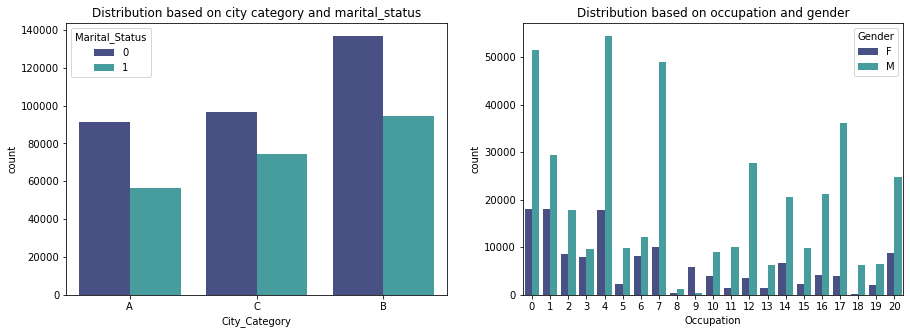

In [24]:
# Distribution based on city category
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['City_Category'], hue=df['Marital_Status'], palette='mako', ax=axis[0]).set_title('Distribution based on city category and marital_status')
sns.countplot(x=df['Occupation'], hue=df['Gender'], palette='mako', ax=axis[1]).set_title('Distribution based on occupation and gender')
plt.show()

In [25]:
round(pd.crosstab(df.Marital_Status, df.City_Category, margins=True, normalize='columns')*100,2)

City_Category,A,B,C,All
Marital_Status,,,,
0,61.72,59.14,56.57,59.03
1,38.28,40.86,43.43,40.97


### Observation

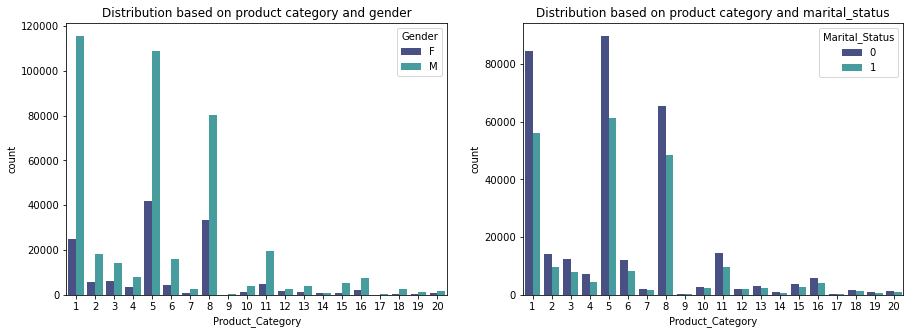

In [26]:
# Distribution based on product category
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df.Product_Category, hue=df.Gender, palette='mako', ax=axis[0]).set_title('Distribution based on product category and gender')
sns.countplot(x=df.Product_Category, hue=df.Marital_Status, palette='mako', ax=axis[1]).set_title('Distribution based on product category and marital_status')
plt.show()

### Observation

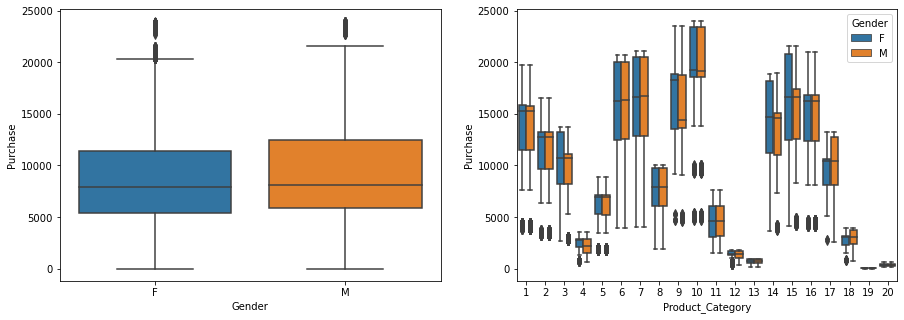

In [27]:
# Spend analysis for males and females using boxplot
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x=df['Gender'], y=df['Purchase'], ax=axis[0])
sns.boxplot(x=df['Product_Category'], y=df['Purchase'], hue=df['Gender'], ax=axis[1])
plt.show()

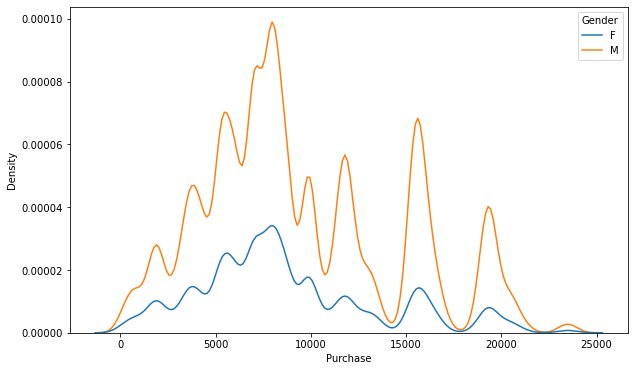

In [28]:
# Pattern for male and female purchasing
plt.figure(figsize=(10,6))
sns.kdeplot(df['Purchase'], hue=df['Gender'])
plt.show()

In [29]:
# Average amount spend by males and females
unique_user.groupby(['Gender'])['Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Purchase, dtype: float64

In [30]:
# Total amount spend by males and females
unique_user.groupby(['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

### Observation

In [31]:
# Distribution of spends for male and female
males_purchase = unique_user[unique_user['Gender']=='M']['Purchase']
females_purchase = unique_user[unique_user['Gender']=='F']['Purchase']
num_samples = 1000
males_means = []
females_means = []
for i in range(1000):
    males_mean = males_purchase.sample(num_samples, replace=True).mean()
    females_mean = females_purchase.sample(num_samples, replace=True).mean()
    males_means.append(males_mean)
    females_means.append(females_mean)

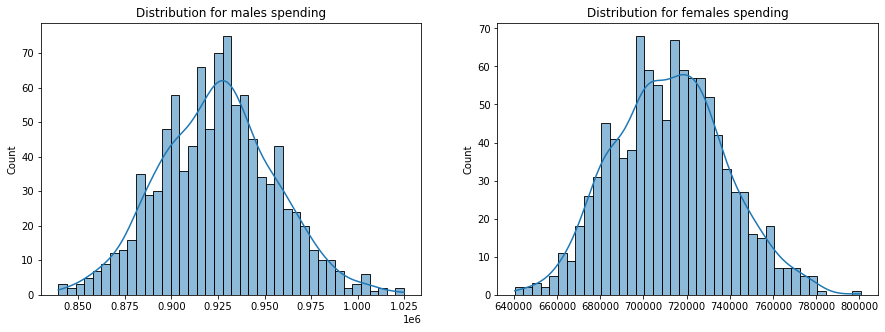

In [32]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.histplot(males_means, bins=40, kde=True, ax=axis[0]).set_title('Distribution for males spending')
sns.histplot(females_means, bins=40, kde=True, ax=axis[1]).set_title('Distribution for females spending')
plt.show()

### Observation 

### Average spendings with confidence interval 95%

In [33]:
# Average spendings for males with confidence interval 95%
sample_mean_m = np.mean(males_means)
print('Sample mean for males spendings:',round(sample_mean_m,2))
# Standard error for males 
se_m = np.std(males_means) / np.sqrt(len(males_means))
print('Standard error for males:', round(se_m,2))
# z-value for confidence value 95%
from scipy import stats
z_m = abs(stats.distributions.norm.ppf(0.025))
print('z-value for males:',round(z_m,2))
# lower range and upper range for average males spendings
print('Average males spendings with confidence interval 95% ranges from',(round(sample_mean_m - z_m*se_m,2), round(sample_mean_m + z_m*se_m,2)))

Sample mean for males spendings: 924754.39
Standard error for males: 972.8
z-value for males: 1.96
Average males spendings with confidence interval 95% ranges from (922847.74, 926661.04)


In [34]:
# Average spendings for females with confidence interval 95%
sample_mean_f = np.mean(females_means)
print('Sample mean for females spendings:',round(sample_mean_f,2))
# Standard error for females 
se_f = np.std(females_means) / np.sqrt(len(females_means))
print('Standard error for females:', round(se_f,2))
# z-value for confidence value 95%
from scipy import stats
z_f = abs(stats.distributions.norm.ppf(0.025))
print('z-value for females:',round(z_f,2))
# lower range and upper range for average females spendings
print('Average females spendings with confidence interval 95% ranges from',(round(sample_mean_f - z_f*se_f,2), round(sample_mean_f + z_f*se_f,2)))

Sample mean for females spendings: 712307.46
Standard error for females: 812.42
z-value for females: 1.96
Average females spendings with confidence interval 95% ranges from (710715.14, 713899.78)


### Observation

### Average spendings with confidence interval 90%

In [35]:
# Average spendings for males with confidence interval 90%
# z-value for confidence value 90%
from scipy import stats
z_m1 = abs(stats.distributions.norm.ppf(0.05))
print('z-value for males:',round(z_m1,2))
# lower range and upper range for average males spendings
print('Average males spendings with confidence interval 90% ranges from',(round(sample_mean_m - z_m1*se_m,2), round(sample_mean_m + z_m1*se_m,2)))

z-value for males: 1.64
Average males spendings with confidence interval 90% ranges from (923154.28, 926354.5)


In [36]:
# Average spendings for females with confidence interval 90%
# z-value for confidence value 90%
from scipy import stats
z_f1 = abs(stats.distributions.norm.ppf(0.05))
print('z-value for females:',round(z_f1,2))
# lower range and upper range for average females spendings
print('Average females spendings with confidence interval 90% ranges from',(round(sample_mean_f - z_f1*se_f,2), round(sample_mean_f + z_f1*se_f,2)))

z-value for females: 1.64
Average females spendings with confidence interval 90% ranges from (710971.14, 713643.78)


### Observation

### Average spendings for married and unmarried

In [37]:
# Distribution of spends for married and unmarried
marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
marital = marital.reset_index()
married_purchase = marital[marital['Marital_Status']==1]['Purchase']
unmarried_purchase = marital[marital['Marital_Status']==0]['Purchase']
num_samples = 1000
married_means = []
unmarried_means = []
for i in range(1000):
    married_mean = married_purchase.sample(num_samples, replace=True).mean()
    unmarried_mean = unmarried_purchase.sample(num_samples, replace=True).mean()
    
    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)

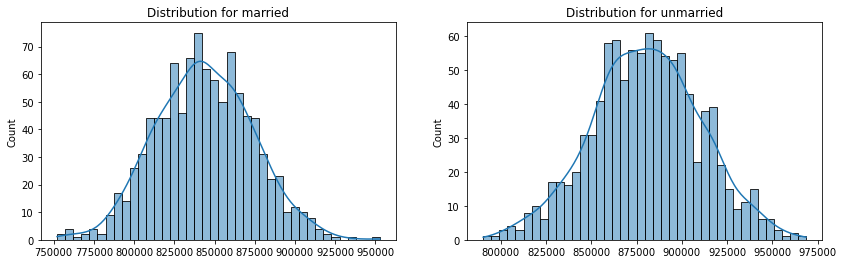

In [38]:
fig, axis = plt.subplots(1,2,figsize=(14,4))
sns.histplot(married_means, bins=40, kde=True, ax=axis[0]).set_title('Distribution for married')
sns.histplot(unmarried_means, bins=40, kde=True, ax=axis[1]).set_title('Distribution for unmarried')
plt.show()

### Observation

### Average spendings with confidence interval 95%

In [39]:
# Average spendings for married with confidence interval 95%
sample_mean_married = np.mean(married_means)
print('Sample mean for married spendings:',round(sample_mean_married,2))
# Standard error for married 
se_married = np.std(married_means) / np.sqrt(len(married_means))
print('Standard error for married:', round(se_married,2))
# z-value for confidence value 95%
from scipy import stats
z_married = abs(stats.distributions.norm.ppf(0.025))
print('z-value for married:',round(z_married,2))
# lower range and upper range for average married spendings
print('Average married spendings with confidence interval 95% ranges from',(round(sample_mean_married - z_married*se_married,2), round(sample_mean_married + z_married*se_married,2)))

Sample mean for married spendings: 843566.35
Standard error for married: 945.69
z-value for married: 1.96
Average married spendings with confidence interval 95% ranges from (841712.83, 845419.86)


In [40]:
# Average spendings for unmarried with confidence interval 95%
sample_mean_unmarried = np.mean(unmarried_means)
print('Sample mean for unmarried spendings:',round(sample_mean_unmarried,2))
# Standard error for unmarried 
se_unmarried = np.std(unmarried_means) / np.sqrt(len(unmarried_means))
print('Standard error for unmarried:', round(se_unmarried,2))
# z-value for confidence value 95%
from scipy import stats
z_unmarried = abs(stats.distributions.norm.ppf(0.025))
print('z-value for unmarried:',round(z_unmarried,2))
# lower range and upper range for average unmarried spendings
print('Average unmarried spendings with confidence interval 95% ranges from',(round(sample_mean_unmarried - z_unmarried*se_unmarried,2), round(sample_mean_unmarried + z_unmarried*se_unmarried,2)))

Sample mean for unmarried spendings: 880345.7
Standard error for unmarried: 945.38
z-value for unmarried: 1.96
Average unmarried spendings with confidence interval 95% ranges from (878492.78, 882198.62)


### Observation

### Average spendings with confidence interval 90%

In [41]:
# Average spendings for married with confidence interval 90%
# z-value for confidence value 90%
from scipy import stats
z_married1 = abs(stats.distributions.norm.ppf(0.05))
print('z-value for married:',round(z_married1,2))
# lower range and upper range for average married spendings
print('Average married spendings with confidence interval 90% ranges from',(round(sample_mean_married - z_married1*se_married,2), round(sample_mean_married + z_married1*se_married,2)))

z-value for married: 1.64
Average married spendings with confidence interval 90% ranges from (842010.83, 845121.86)


In [42]:
# Average spendings for unmarried with confidence interval 90%
# z-value for confidence value 90%
from scipy import stats
z_unmarried1 = abs(stats.distributions.norm.ppf(0.05))
print('z-value for unmarried:',round(z_unmarried1,2))
# lower range and upper range for average unmarried spendings
print('Average unmarried spendings with confidence interval 90% ranges from',(round(sample_mean_unmarried - z_unmarried1*se_unmarried,2), round(sample_mean_unmarried + z_unmarried1*se_unmarried,2)))

z-value for unmarried: 1.64
Average unmarried spendings with confidence interval 90% ranges from (878790.68, 881900.72)


### Observation

### Average spendings for age groups

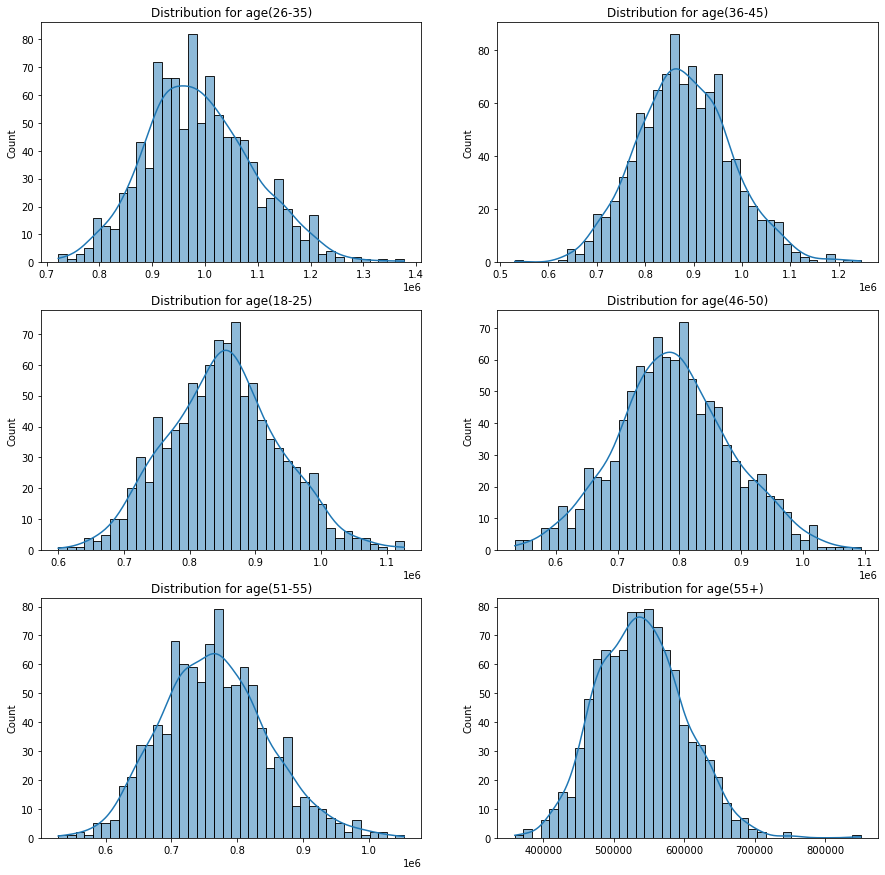

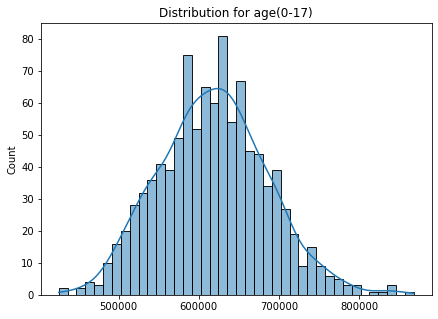

In [43]:
# Average spendings for age groups
age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age = age.reset_index()
age_groups = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
sample_size = 100
age_means = {}
for i in age_groups:
    age_means[i] = []
for i in age_groups:
    for j in range(1000):
        age_mean = age[age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        age_means[i].append(age_mean)
        

fig, axis = plt.subplots(3,2,figsize=(15,15))
sns.histplot(age_means['26-35'], bins=40, kde=True, ax=axis[0,0]).set_title('Distribution for age(26-35)')
sns.histplot(age_means['36-45'], bins=40, kde=True, ax=axis[0,1]).set_title('Distribution for age(36-45)')
sns.histplot(age_means['18-25'], bins=40, kde=True, ax=axis[1,0]).set_title('Distribution for age(18-25)')
sns.histplot(age_means['46-50'], bins=40, kde=True, ax=axis[1,1]).set_title('Distribution for age(46-50)')
sns.histplot(age_means['51-55'], bins=40, kde=True, ax=axis[2,0]).set_title('Distribution for age(51-55)')
sns.histplot(age_means['55+'], bins=40, kde=True, ax=axis[2,1]).set_title('Distribution for age(55+)')
plt.show()
plt.figure(figsize=(7,5))
sns.histplot(age_means['0-17'], bins=40, kde=True).set_title('Distribution for age(0-17)')
plt.show()

### Observation

### Spendings for each age group with confidence interval 90%

In [44]:
# Sample mean for each age group
all_sample_means = {}
all_population_means = {}
for i in age_groups:
    all_sample_means[i] = []
    all_population_means[i] = []
    population_mean = age[age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)    
print("Sample means for each age groups:", all_population_means)

Sample means for each age groups: {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


In [45]:
for i in age_groups:
    for j in range(1000):
        age_mean = age[age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(age_mean)
        
z = abs(stats.distributions.norm.ppf(0.05))      
for value in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_age = age[age['Age']==value] 
    
    std_e_age = z * new_age['Purchase'].std()/np.sqrt(len(new_age))
    sample_mean_age = new_age['Purchase'].mean()
    lower_range = round(sample_mean_age - std_e_age, 2)
    upper_range = round(sample_mean_age + std_e_age, 2)
    print('Average spendings for age group',value,'with confidence interval 90% :', (lower_range, upper_range))

Average spendings for age group 26-35 with confidence interval 90% : (952209.61, 1027109.02)
Average spendings for age group 36-45 with confidence interval 90% : (832403.1, 926928.32)
Average spendings for age group 18-25 with confidence interval 90% : (810191.63, 899534.61)
Average spendings for age group 46-50 with confidence interval 90% : (726214.9, 858882.66)
Average spendings for age group 51-55 with confidence interval 90% : (703777.65, 822624.2)
Average spendings for age group 55+ with confidence interval 90% : (487037.6, 592356.89)
Average spendings for age group 0-17 with confidence interval 90% : (542327.27, 695408.35)


### Spendings for each age group with confidence interval 95%

In [46]:
z = abs(stats.distributions.norm.ppf(0.025))      
for value in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_age = age[age['Age']==value] 
    
    std_e_age = z * new_age['Purchase'].std()/np.sqrt(len(new_age))
    sample_mean_age = new_age['Purchase'].mean()
    lower_range = round(sample_mean_age - std_e_age, 2)
    upper_range = round(sample_mean_age + std_e_age, 2)
    print('Average spendings for age group',value,'with confidence interval 95% :',(lower_range, upper_range))

Average spendings for age group 26-35 with confidence interval 95% : (945035.24, 1034283.39)
Average spendings for age group 36-45 with confidence interval 95% : (823348.84, 935982.58)
Average spendings for age group 18-25 with confidence interval 95% : (801633.75, 908092.49)
Average spendings for age group 46-50 with confidence interval 95% : (713507.09, 871590.48)
Average spendings for age group 51-55 with confidence interval 95% : (692393.73, 834008.12)
Average spendings for age group 55+ with confidence interval 95% : (476949.41, 602445.08)
Average spendings for age group 0-17 with confidence interval 95% : (527664.13, 710071.49)


### Observation

### Answering questions

### Conclusion

### Recommendations